# Chapter 14: Fitting functions to data

Helper functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

In [2]:
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    fv = np.vectorize(f)
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    z = fv(X,Y)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)

In [3]:
from vectors import length 
def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y),y0,dx=dx)
    return (partial_x,partial_y)
    
def gradient_descent(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        grad = approx_gradient(f,x,y)
    return x,y

import car data

In [4]:
from car_data import priuses

# 14.1 Measuring the quality of fit for a function

## 14.1.1 Measuring distance from a function

In [5]:
test_data = [
     (-1.0, -2.0137862606487387),
     (-0.9, -1.7730222478628337),
     (-0.8, -1.5510125944820812),
     (-0.7, -1.6071832453434687),
     (-0.6, -0.7530149734137868),
     (-0.5, -1.4185018340443283),
     (-0.4, -0.6055579756271128),
     (-0.3, -1.0067254915961406),
     (-0.2, -0.4382360549665138),
     (-0.1, -0.17621952751051906),
     (0.0, -0.12218090884626329),
     (0.1, 0.07428573423209717),
     (0.2, 0.4268795998864943),
     (0.3, 0.7254661223608084),
     (0.4, 0.04798697977420063),
     (0.5, 1.1578103735448106),
     (0.6, 1.5684111061340824),
     (0.7, 1.157745051031345),
     (0.8, 2.1744401978240675),
     (0.9, 1.6380001974121732),
     (1.0, 2.538951262545233)
]

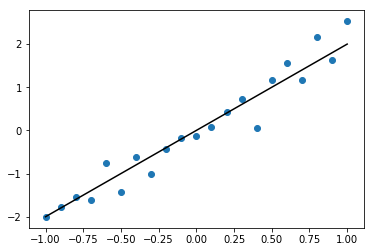

In [6]:
plt.scatter([t[0] for t in test_data],[t[1] for t in test_data])
plot_function(lambda x: 2*x,-1,1,c='k')
plt.savefig('14.05.svg')

Here's the drawing routine I used to illustrate the absolute value cost function

In [7]:
def draw_cost(h,points):
    xs = [t[0] for t in points]
    ys = [t[1] for t in points]
    plt.scatter(xs,ys)
    plot_function(h,min(xs),max(xs),c='k')
    for (x,y) in points:
        plt.plot([x,x],[y,h(x)],c='r')

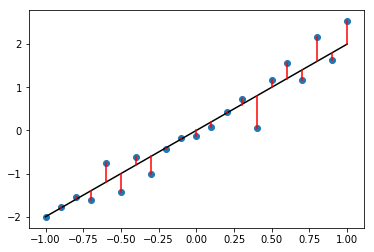

In [8]:
draw_cost(lambda x: 2*x, test_data)
plt.savefig('14.06.svg')

In [9]:
def sum_error(f,data):
    errors = [abs(f(x) - y) for (x,y) in data]
    return sum(errors)

In [10]:
def f(x): 
    return 2*x

def g(x): 
    return 1-x

In [11]:
sum_error(f,test_data)

5.021727176394801

In [12]:
sum_error(g,test_data)

38.47711311130152

## 14.1.2 Summing the squares of the errors

In [13]:
def sum_squared_error(f,data):
    squared_errors = [(f(x) - y)**2 for (x,y) in data]
    return sum(squared_errors)

here's a function to picture the sum_squared_error for a line

In [14]:
def draw_square_cost(h,points):
    xs = [t[0] for t in points]
    ys = [t[1] for t in points]
    plt.scatter(xs,ys)
    plot_function(h,min(xs),max(xs),c='k')
    for (x,y) in points:
        e = abs(y - h(x))
        plt.plot([x,x],[y,h(x)],c='r')
        plt.fill([x,x,x+e,x+e],[h(x),y,y,h(x)],c='r',alpha=0.5)

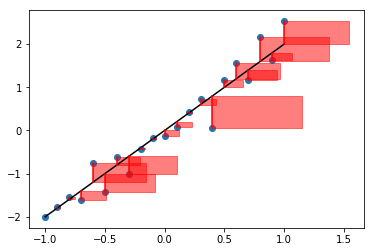

In [82]:
draw_square_cost(lambda x: 2*x, test_data)
plt.savefig('14.09.svg')

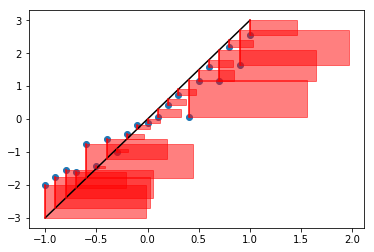

In [15]:
draw_square_cost(lambda x: 3*x, test_data)
plt.savefig('14.10.svg')

In [16]:
sum_squared_error(f,test_data)

2.105175107540148

In [17]:
97.1078879283203

97.1078879283203

## 14.1.3 Calculating cost for car price functions

In [18]:
def plot_mileage_price(cars):
    prices = [c.price for c in cars]
    mileages = [c.mileage for c in cars]
    plt.scatter(mileages, prices, alpha=0.5)
    plt.ylabel("Price ($)",fontsize=16)
    plt.xlabel("Odometer (mi)",fontsize=16)

In [19]:
def p1(x):
    return 25000 - 0.2 * x

def p2(x):
    return 25000 - 0.1 * x

def p3(x):
    return 22500 - 0.1 * x

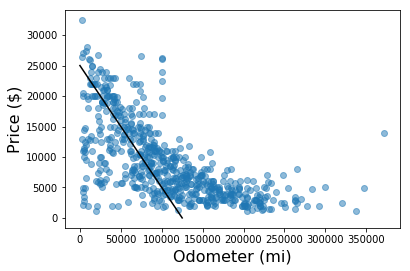

In [20]:
plot_mileage_price(priuses)
plot_function(p1,0,125000,c='k')
plt.savefig('14.11.svg')

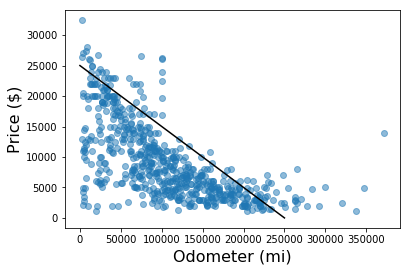

In [21]:
plot_mileage_price(priuses)
plot_function(p2,0,250000,c='k')
plt.savefig('14.12.svg')

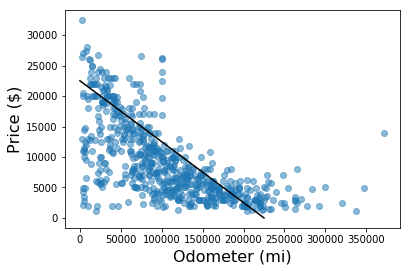

In [22]:
plot_mileage_price(priuses)
plot_function(p3,0,225000,c='k')
plt.savefig('14.13.svg')

In [23]:
prius_mileage_price = [(p.mileage, p.price) for p in priuses]

In [24]:
sum_squared_error(p1, prius_mileage_price)

88782506640.24004

In [25]:
sum_squared_error(p2, prius_mileage_price)

34723507681.56002

In [26]:
sum_squared_error(p3, prius_mileage_price)

22997230681.560017

## 14.1.4 Exercises

**Exercise:** Create a set of data points lying on a line and demonstrate that the `sum_error` and `sum_squared_error` cost functions both return exactly zero for the appropriate linear function.

In [27]:
def line(x):
    return 3*x-2
points = [(x,line(x)) for x in range(0,10)]

In [28]:
sum_error(line,points)

0

In [29]:
sum_squared_error(line,points)

0

**Exercise:** Calculate the value of the cost for the two linear functions $x + 0.5$ and $2x - 1$.  Which one produces a lower sum squared error relative to the `test_data` and what does that say about the quality of the fits?

In [30]:
sum_squared_error(lambda x:2*x-1,test_data)

23.1942461283472

In [31]:
sum_squared_error(lambda x:x+0.5,test_data)

16.607900877665685

**Exercise:** Find a linear function `p4` that fits the data even better than `p1`, `p2`, or `p3`.  Demonstrate that it is a better fit by showing the cost function is lower than for `p1`, `p2`, or `p3`.

In [32]:
def p4(x):
    return 20000 - 0.1 * x

In [33]:
sum_squared_error(p4, prius_mileage_price)

18958453681.560005

## 14.2 Exploring spaces of functions

## 14.2.1 Picturing cost for lines through the origin

In [34]:
def test_data_coefficient_cost(a):
    def f(x):
        return a * x
    return sum_squared_error(f,test_data)

Plots from the chapter

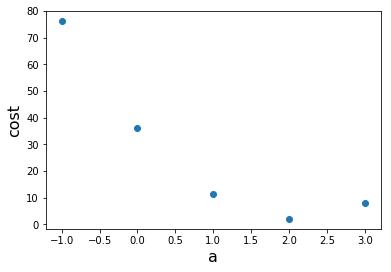

In [35]:
some_slopes = [-1,0,1,2,3]
plt.scatter(some_slopes,[test_data_coefficient_cost(a) for a in some_slopes])
plt.ylabel("cost", fontsize=16)
plt.xlabel("a", fontsize=16)
plt.savefig('14.15a.svg')

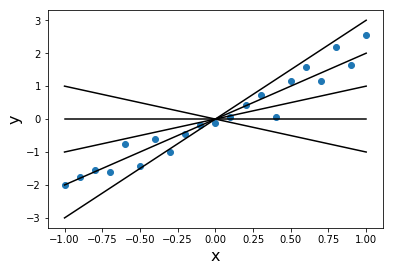

In [36]:
plt.scatter([t[0] for t in test_data],[t[1] for t in test_data])
for a in some_slopes:
    plot_function(lambda x: a*x, -1, 1, c='k')
plt.ylabel("y", fontsize=16)
plt.xlabel("x", fontsize=16)
plt.savefig('14.15b.svg')

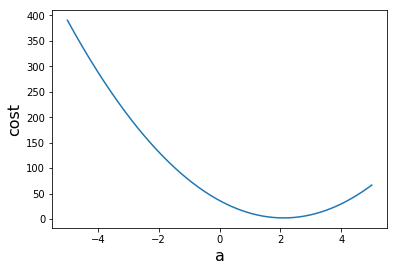

In [37]:
plot_function(test_data_coefficient_cost, -5, 5)
plt.ylabel("cost", fontsize=16)
plt.xlabel("a", fontsize=16)
plt.savefig('14.16.svg')

## 14.2.2 The space of all linear functions

In [38]:
def coefficient_cost(a,b):
    def p(x):
        return a * x + b
    return sum_squared_error(p,prius_mileage_price)

In [39]:
def coefficient_cost(a,b):
    def p(x):
        return a * x + b
    return sum_squared_error(p,prius_mileage_price)

Plots from the chapter

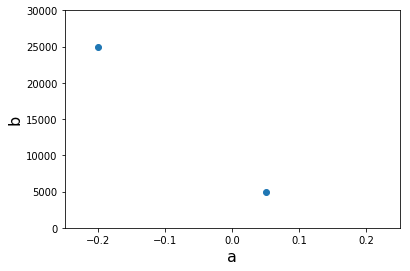

In [40]:
plt.scatter([-0.2,0.05],[25000,5000])
plt.ylabel("b", fontsize=16)
plt.xlabel("a", fontsize=16)
plt.ylim(0,30000)
plt.xlim(-0.25,0.25)
plt.savefig('14.17a.svg')

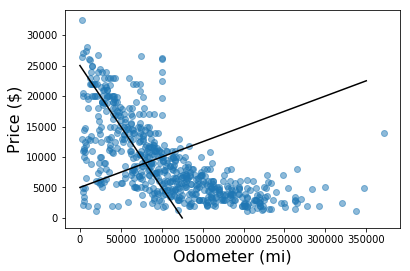

In [41]:
plot_mileage_price(priuses)
plot_function(lambda x: 25000 - 0.20*x,0,125000,c='k')
plot_function(lambda x: 5000 + 0.05*x,0,350000,c='k')
plt.savefig('14.17b.svg')

<Figure size 504x504 with 0 Axes>

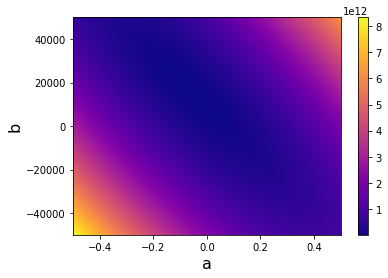

In [42]:
scalar_field_heatmap(coefficient_cost,-0.5,0.5,-50000,50000)
plt.ylabel("b",fontsize=16)
plt.xlabel("a",fontsize=16)
plt.savefig('14.18.svg')

## 14.2.3 Exercises

# 14.3 Finding the line of best fit using gradient descent

## 14.3.1 Rescaling the data

In [43]:
def scaled_cost_function(c,d):
    return coefficient_cost(0.5*c,50000*d)/1e13

In [44]:
mileages = [p.mileage for p in priuses]
prices = [p.price for p in priuses]

In [45]:
def scaled_cost_function(c,d):
    return coefficient_cost(0.5*c,50000*d)/1e13

## 14.3.2 Finding and plotting the line of best fit

In [46]:
c,d = gradient_descent(scaled_cost_function,0,0)

In [47]:
(c,d)

(-0.1211190178117733, 0.31495422888042623)

In [48]:
a = 0.5*c
b = 50000*d
(a,b)

(-0.06055950890588665, 15747.711444021312)

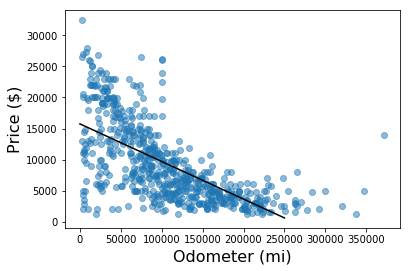

In [49]:
plot_mileage_price(priuses)

def p(x):
    return a*x + b

plot_function(p,0,250000,c='k')
plt.savefig('14.19.svg')

In [50]:
coefficient_cost(a,b)

14536218169.403484

## 14.3.3 Exercises

**Exercise:** Use gradient descent to find the linear function that best fits the `test_data`.  Your resulting function should be close to $2x + 0$ but not exactly, because the data was randomly generated around that line.

In [51]:
def test_data_linear_cost(a,b):
    def f(x):
        return a*x+b
    return sum_squared_error(f,test_data)

<Figure size 504x504 with 0 Axes>

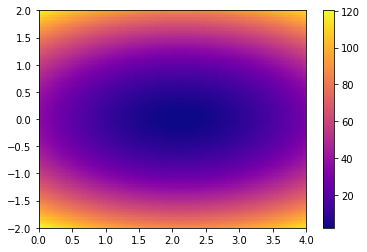

In [52]:
scalar_field_heatmap(test_data_linear_cost,-0,4,-2,2)
plt.savefig('ex14.6.soln.svg')

In [53]:
gradient_descent(test_data_linear_cost,1,1)

(2.103718204723903, 0.0021207385903566456)

# 14.4 Fitting a nonlinear function

## 14.4.1 Understanding the behavior of exponential functions

In [54]:
from math import exp

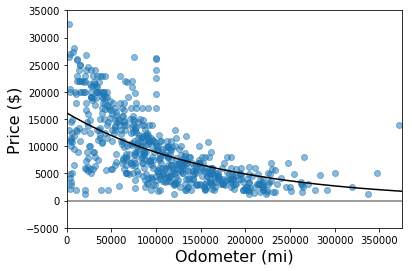

In [55]:
plot_mileage_price(priuses)
plt.ylim(-5000,35000)
plt.xlim(0,375000)
plot_function(lambda x:0, -50000, 400000, c='gray')
q,r = (16133.220556990309, -5.951793936498175e-06)
plot_function(lambda x: q*exp(r*x),0,375000,c='k')
plt.savefig('14.20a.svg')

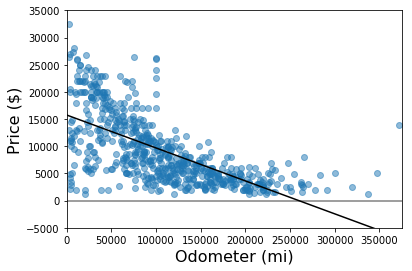

In [56]:
plot_mileage_price(priuses)
plt.ylim(-5000,35000)
plt.xlim(0,375000)
plot_function(lambda x:0, -50000, 400000, c='gray')

plot_function(lambda x: a*x + b,0,375000,c='k')
plt.savefig('14.20b.svg')

## 14.4.2 Finding the exponential function of best fit

In [57]:
def exp_coefficient_cost(q,r):
    def f(x):
        return q*exp(r*x) #<1>
    return sum_squared_error(f,prius_mileage_price)

<Figure size 504x504 with 0 Axes>

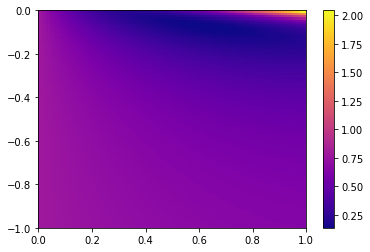

In [58]:
def scaled_exp_coefficient_cost(s,t):
    return exp_coefficient_cost(30000*s,1e-4*t) / 1e11

scalar_field_heatmap(scaled_exp_coefficient_cost,0,1,-1,0)
plt.savefig('14.21.svg')

In [59]:
s,t = gradient_descent(scaled_exp_coefficient_cost,0,0)
(s,t)

(0.6235404892877398, -0.07686877731111157)

In [60]:
q,r = 30000*s,1e-4*t
(q,r)

(18706.214678632194, -7.686877731111157e-06)

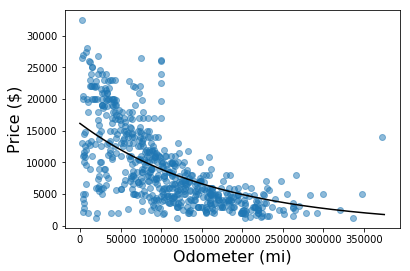

In [61]:
plot_mileage_price(priuses)
q,r = (16133.220556990309, -5.951793936498175e-06)
plot_function(lambda x: q*exp(r*x),0,375000,c='k')
plt.savefig('14.22.svg')

In [62]:
exp_coefficient_cost(q,r)

14071654468.280846

## 14.4.3 Exercises

**Exercise:** Confirm, by choosing a sample value of $r$, that $e^{-rx}$ decreases by a factor of $e$ every time $x$ increases by $1/r$ units.

In [63]:
def test(x):
    return exp(-3*x)

In [64]:
test(0)

1.0

In [65]:
from math import e

In [66]:
test(1/3), test(0)/e

(0.36787944117144233, 0.36787944117144233)

In [67]:
(0.1353352832366127, 0.1353352832366127)

(0.1353352832366127, 0.1353352832366127)

In [68]:
(0.049787068367863944, 0.04978706836786395)

(0.049787068367863944, 0.04978706836786395)

**Exercise:** According to the exponential function of best fit, what percent of the value of a prius is lost every 10,000 miles?

In [69]:
exp(r * 10000)

0.9422186306357088

**Exercise:** Asserting that the retail price (the price at zero miles) is $\$25,000$ what is the exponential function that best fits the data?  In other words, fixing $q = 25,000$, what is the value of $r$ yielding the best fit for $qe^{rx}$?

In [70]:
def exponential_cost2(r):
    def f(x):
        return 25000 * exp(r*x)
    return sum_squared_error(f,prius_mileage_price)

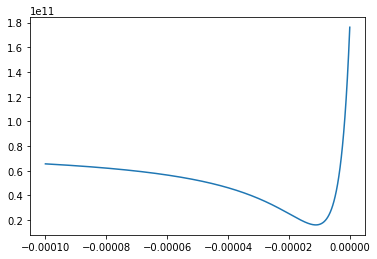

In [71]:
plot_function(exponential_cost2,-1e-4,0)
plt.savefig('ex14.9solna.svg')

In [72]:
# note that r = -1.12e-5 yields a smaller cost function than some values around it.
exponential_cost2(-1.11e-5), exponential_cost2(-1.12e-5), exponential_cost2(-1.13e-5)

(16157457680.500858, 16156919168.114101, 16161508051.813215)

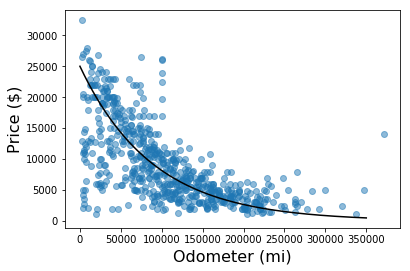

In [73]:
plot_mileage_price(priuses)
plot_function(lambda x: 25000 * exp(-1.12e-5 * x), 0, 350000, c='k')
plt.savefig('ex14.9solnb.svg')

# Misc Figures

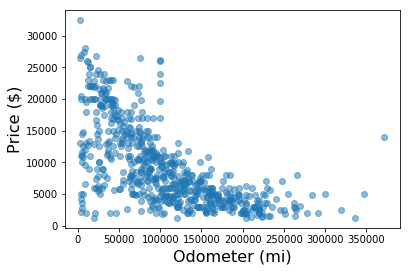

In [74]:
plot_mileage_price(priuses)
# plot_function(lambda x: 25000 * exp(-1.12e-5 * x), 0, 350000, c='k')
plt.savefig('14.01.svg')

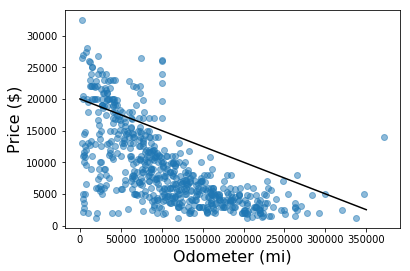

In [75]:
plot_mileage_price(priuses)
plot_function(lambda x: 20000 -0.05*x, 0, 350000, c='k')
plt.savefig('14.03.svg')

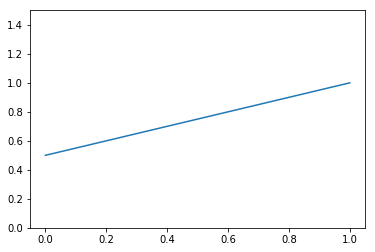

In [76]:
plot_function(lambda x: 0.5 + 0.5*x, 0, 1, c='C0')
plt.ylim(0,1.5)
plt.savefig('14.04.svg')

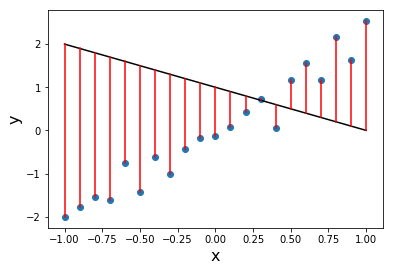

In [77]:
draw_cost(lambda x: 1-x, test_data)
plt.ylabel("y", fontsize=16)
plt.xlabel("x", fontsize=16)
plt.savefig('14.07.svg')

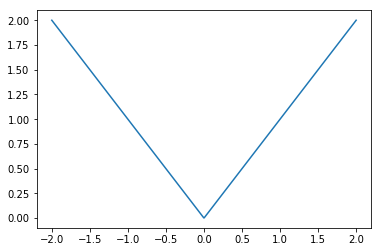

In [78]:
plot_function(lambda x: abs(x),-2,2)
plt.savefig('14.08a.svg')

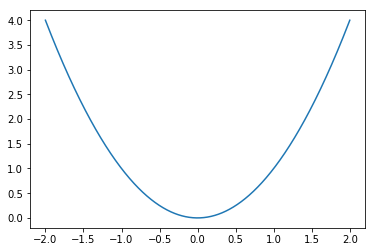

In [79]:
plot_function(lambda x: x*x, -2,2)
plt.savefig('14.08b.svg')

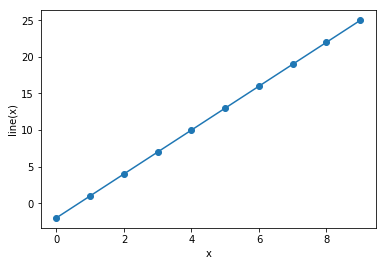

In [80]:
def line(x):
    return 3*x-2
points = [(x,line(x)) for x in range(0,10)]
plt.scatter(*zip(*points))
plt.plot(*zip(*points))
plt.xlabel('x')
plt.ylabel('line(x)')
plt.savefig('EXERCISE14.1.svg')

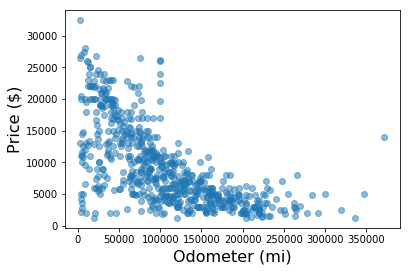

In [81]:
plot_mileage_price(priuses)
# plot_function(lambda x: 25000 * exp(-1.12e-5 * x), 0, 350000, c='k')
plt.savefig('14.14.svg')